In [2]:
from graphviz import Digraph

def visualize_tree(tree):
    if tree is None:
        return "Nothing in the tree!"
    def add_nodes_edges(tree, dot=None):
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name=str(tree), label=str(tree.value))
            
        for child in [tree.left, tree.right]:
            if child is not None:
                if child == tree.left:
                    dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')
                if child == tree.right:
                    dot.attr('node', shape='doublecircle', style='filled', fillcolor='seashell')
                dot.node(name=str(child), label=str(child.value))    
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot)
        return dot
    
    dot = add_nodes_edges(tree)
    
    display(dot)

class TreeNode:
    
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
    
class BST(TreeNode):
    def __init__(self, value, parent=None):
        super().__init__(value)
        self.parent = parent
        
    def insert(self, val):
        if val < self.value:   #for left side
            if self.left is None:
                self.left = BST(val, self)
            else:
                self.left.insert(val)
        
        else:
            if self.right is None:
                self.right = BST(val, self)
            else:
                self.right.insert(val)
    
    def find_min(self):
        if self.left:
            return self.left.find_min()
            
        else:
            return self
    
    def _find_one_child(self):
        if self.left is not None  and  self.right is None:
            return self.left
        elif self.right is not None and self.left is None:
            return self.right
        elif self.left is not None and self.right is not None:
            return "Both childs"
        else:
            return None
            
    def delete(self, val_to_delete):
        #if greater then root
        if val_to_delete > self.value:
            if self.right.value == val_to_delete:
                
                one_child = self.right._find_one_child()
                if one_child != "Both childs" and one_child != None: #case 2
                    self.right.value = one_child.value
                    if one_child == one_child.parent.left:
                        one_child.parent.left = None
                    else:
                        one_child.parent.right = None
                        
                elif one_child == "Both childs":#case 3
                    min_node = self.right.right.find_min()
                    self.right.delete(min_node.value)
                    self.right.value = min_node.value
                    
                
                else:
                    self.right = None  #case 1
            
            else:
                self.right.delete(val_to_delete)
                
        #if less then root
        elif val_to_delete < self.value:
            if self.left.value == val_to_delete:
                
                one_child = self.right._find_one_child()
                if one_child != "Both childs" and one_child != None: #case 2
                    self.left.value = one_child.value
                    if one_child == one_child.parent.left:
                        one_child.parent.left = None
                    else:
                        one_child.parent.right = None
                        
                elif one_child == "Both childs":#case 3
                    min_node = self.left.right.find_min()
                    self.left.delete(min_node.value)
                    self.left.value = min_node.value
                
                else:
                    self.left = None #case 1
            
            else:
                self.left.delete(val_to_delete)
                
        
        elif val_to_delete == self.value:
            one_child = self.right._find_one_child()
            if one_child != "Both childs" and one_child != None: #case 2
                self.value = one_child.value
                if one_child == one_child.parent.left:
                    one_child.parent.left = None
                else:
                    one_child.parent.right = None
                        
            elif one_child == "Both childs":#case 3
                min_node = self.right.find_min()
                self.delete(min_node.value)
                self.value = min_node.value
                
                
                
def heapify(l, n, root):
    largest_ind = root
    left_ind = 2*root + 1
    right_ind = 2*root + 2
    
    if left_ind < n and l[left_ind] > l[largest_ind]:
        largest_ind = left_ind
    
    if right_ind < n and l[right_ind] > l[largest_ind]:
        largest_ind = right_ind
        
    if largest_ind != root:
        l[root], l[largest_ind] = l[largest_ind], l[root]
        
        heapify(l, n, largest_ind)
        

def build_heap(l):
    n = len(l)
    
    for ind in reversed( range( n//2 ) ):
        heapify(l, n, ind)
        
def heap_sort(l):
    n = len(l)
    
    build_heap(l)
    
    for i in reversed( range( n ) ):
        l[i], l[0] = l[0], l[i]
        
        heapify(l, i, 0)

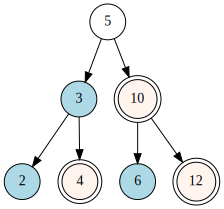

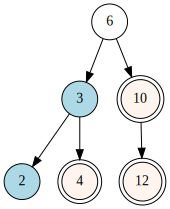

[12, 4, 10, 2, 3, 6, 5]
[2, 3, 4, 5, 6, 10, 12]


In [3]:
b = BST(5)
b.insert(10)
b.insert(3)
b.insert(6)
b.insert(12)
b.insert(2)
b.insert(4)
visualize_tree(b)


b.delete(5)
visualize_tree(b)
h = [2, 4, 6, 12, 3, 10, 5]
build_heap(h)
print(h)
heap_sort(h)
print(h)

In [7]:
l = [1, 2, 3, 4, 5, 6]
build_heap(l)
print(l)
heap_sort(l)
print(l)

[6, 5, 3, 4, 2, 1]
[1, 2, 3, 4, 5, 6]


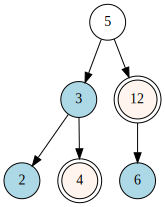

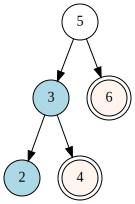